# Lab 8: Fitting Data

Today we will take a bit of a detour from *creating theoretical models* to *fitting* models to existing data. In a sense, fitting straight lines to data is the most important exercise in physics. It is how we test our theoretical understanding, and how we build intuition about the world.

A linear model has two parameters, $a$ and $b$:

$$
y(x) = a + b x.
$$

When we have a set of $i$ data points, we have $i$ equations for a linear model. Since one only needs two points to define a linear model, if $i >2$ we either have redundant data or multiple, conflicting linear models. 

To see this, consider the following data, where $x_i$ is an equally spaced independent variable, and $y_i$ represents some data measured by an experiment. 

It's extremely important to remember what we're doing here, as we'll get down into the details quite a bit. **We are attempting to find $a$ and $b$, the *parameters* of the model, given the data $x_i$ and $y_i$**

In [1]:
import numpy as np

In [2]:
x = np.arange(3)/9.
y = np.array([  0.23696017,   1.28964065,   3.01036873])

Here, we clearly see that $i = 3$. So we can go ahead and write three equations for $a$ and $b$:

$$
\begin{align}
y_0 &= a + b x_0\\
y_1 &= a + b x_1\\
y_2 &= a + b x_2\\
\end{align}
$$

Obviously, if all three $y_i$ do not lie on the same line, each pair of equations will give *different* values for $a$ and $b$. Try this for yourself. In the cell below, compute $a$ and $b$ for two pairs of equations: first use $x_0, y_0$ and $x_1, y_1$ and then use $x_1, y_1$ and $x_2, y_2$.

In [4]:
b_0_1 = (y[1]-y[0])/(x[1]-x[0])
a_0_1 = y[0]-b_0_1*x[0]

b_1_2 = (y[2]-y[1])/(x[2]-x[1])
a_1_2 = y[1]-b_1_2*x[1]

print(f"Using the first two points: a = {a_0_1} and b = {b_0_1}.")
print(f"Using the second two points: a = {a_1_2} and b = {b_1_2}.")


Using the first two points: a = 0.23696017 and b = 9.474124320000001.
Using the second two points: a = -0.43108743000000027 and b = 15.486552720000002.


Of course, in reality, one has far more than three data points and thus far more than a few different possible $a$ and $b$. So we need to come up with a way of estimating the **best** parameters $a$ and $b$ given the data. This is typically called the **best fit**. Here, we'll lay out the method of least squares. The **best fit model** is the one that minimizes a parameter called $\chi^2$:

$$
\chi^2 = \sum_{i=1}^N \frac{(y_i - a - b x_i)^2}{\sigma^2}.
$$

How do we minimize this quantity? The same way we minimize anything else: we take derivatives with respect to the quantities we can change and set them to zero. In this case, $y_i$ and $x_i$ are constants given by the experiment. They are not variables to us! What then do we minimize over? $a$ and $b$! 

$$
\begin{align}
\frac{ \partial \chi^2}{\partial a} &= -2 \sum_{i=1}^N (y_i - a - b x_i) = 0\\
\frac{ \partial \chi^2}{\partial b} &= -2 \sum_{i=1}^N x_i (y_i - a - b x_i) = 0.
\end{align}
$$

**Do the derivatives yourself on a piece of paper.** This looks complicated, but actually, it's just a bunch of linear equations. Computers are rather good at solving those, so all we need to do is rewrite it into a form that is easy to compute. We'll use the language of linear algebra, and create a matrix equation for $a$ and $b$:

$$
\begin{pmatrix}
N & \sum x_i \\
\sum x_i & \sum x_i^2 \\
\end{pmatrix}
\begin{pmatrix}
a \\
b\\
\end{pmatrix}
=
\begin{pmatrix}
\sum y_i\\
\sum x_i y_i\\
\end{pmatrix}
$$

This can clearly be solved for $a$ and $b$ by inverting the matrix on the right hand side, and multiplying that by the left hand side:

$$
\begin{pmatrix}
a \\
b\\
\end{pmatrix}
=
\begin{pmatrix}
\frac{\sum x_i^2}{N \sum x_i^2 - \sum x_i \sum x_i} & \frac{-\sum x_i}{N \sum x_i^2 - \sum x_i \sum x_i} \\
\frac{-\sum x_i}{N \sum x_i^2 - \sum x_i \sum x_i} &  \frac{N}{N \sum x_i^2 - \sum x_i \sum x_i}\\
\end{pmatrix}
\begin{pmatrix}
\sum y_i\\
\sum x_i y_i\\
\end{pmatrix}
$$

**Note carefully:**  $\sum x_i^2 \ne \sum x_i \sum x_i$ (think about this for a minute!)
 
Solving this set of equations gives you the parameters $a$ and $b$ that best fit your data. But, the power of this method is that it not only gives you the best fit, it also gives you an estimate of the error in those parameters. This is why the variance 
$$
\sigma^2 = \lim_{x \to \infty} \frac{1}{N} \sum_{i=1}^N (x_i -\mu)^2,
$$
where $\mu = \lim_{x \to \infty} (\sum_{i=1}^N x_i)/N$ is the mean, is inserted into the definition of $\chi^2$. The variance on each parameter $a$ and $b$ is given by

$$
\sigma_a^2 = \sum_{i=1}^N \sigma^2 \left( \frac{d a}{d y_i} \right)^2 = \frac{\sum x_i^2}{N \sum x_i^2 - \sum x_i \sum x_i} \sigma^2\\
\sigma_b^2 = \sum_{i=1}^N \sigma^2 \left( \frac{d b}{d y_i}\right)^2 = \frac{N}{N \sum x_i^2 - \sum x_i \sum x_i} \sigma^2.
$$

Again, these equations *look* involved, but don't be intimidated. Note that the right hand side of all of these can be computed from the data that you have simply by summing and dividing. These are arithmatical techniques that the computer can already do.

## Another View
Let's look at this from a different perspective. Go back to the $i$ equations that make up our original dataset and the linear model. We can write them as a simple matrix equation:

$$
\begin{pmatrix}
y_1\\
y_2\\
\vdots\\
y_N
\end{pmatrix}
=
\begin{pmatrix}
1 & x_1\\
1 & x_2\\
\vdots & \vdots\\
1 & x_N\\
\end{pmatrix}
\begin{pmatrix}
a \\
b\\
\end{pmatrix},
$$
which can be written simply as $\vec{y} = M \vec{p}$, where $\vec{p} = (a\ b)$ and $M$ is given by
$$
M = \begin{pmatrix}
1 & x_1\\
1 & x_2\\
\vdots & \vdots\\
1 & x_N\\
\end{pmatrix}
$$
. Now, if we multiply both sides by the transpose of $M^T$, we have 
$$
M^T \vec{y} = M^T M \vec{p}
$$,

where (as you should verify for yourself)

$$
M^T \vec{y} = 
\begin{pmatrix}
\sum y_i\\
\sum x_i y_i\\
\end{pmatrix}
$$

and 

$$
M^T M = 
\begin{pmatrix}
N & \sum x_i\\
\sum x_i & \sum x_i^2\\
\end{pmatrix}
$$
Finally, we just solve for $\vec{p}$:
$$
\vec{p} = (M^T M)^{-1} M^T \vec{y}.
$$
By the Gauss-Markov theorem, $\vec{p}$ is the **least squares fit**. And this is all linear algebra that the computer can do for us very, very efficiently! Finally, 
the covariance matrix is given by 

$$
\begin{pmatrix}
\sigma_a^2 & \sigma_{ab}^2\\
\sigma_{ab}^2 & \sigma_b^2\\
\end{pmatrix}
=
(M^T M)^{-1} \sigma^2
$$

This is a clear, easy to implement scheme to do least squares! Let's implement it, but see the note below about acutally using this in practice. Here's a simple dataset to try it on:

In [5]:
x = np.array([0.,1.,2.,3.,4.])
y = np.array([0.05, 0.88, 2.06, 2.95, 4.13])

Now, create $M$, $M^T$ (use `M.transpose()`), and $M^T M$. Since $M$ is just a stack of ones next to the data $x_i$, you can use the `np.column_stack()` command on a list of ones and the data. You can make a list of ones by using `np.ones(len(x))`, which is just like `np.zeros()` modified in the obvious way.

In [6]:
M = np.column_stack([np.ones(len(x)),x])
MT = M.transpose()

Next remember that $M^T M$ is the *dot product* of the two matrices. `numpy` helpfully implements that too:

In [7]:
MTM = np.dot(MT,M)

And of course, it also constructs the inverse for you too:

In [8]:
MTM_inv = np.linalg.inv(MTM)

Finally, we construct $M^T \vec{y}$:

In [9]:
MTy = np.dot(MT,y)

and we can simply get $\vec{p} = (M^T M)^{-1} M^T \vec{y}$ with another dot product:

In [10]:
p = np.dot(MTM_inv,MTy)
print(p)

[-0.032  1.023]


Finally, we make a plot. Plot $x$ and $y$ on the graph using the 'o' symbol (just do `plt.plot(x,y,'o')`). Then, create a fake set of $x$ using linspace from, say, -0.1 to 5. Then, using `a = p[0]` and `b = p[1]` and this new set of x (remember to call it something different), plot your fitted line, $y = a + b x$ 

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,10)

In [12]:
xx = np.linspace(-0.1,5,100)
yy = p[0] + p[1]*xx

Text(0, 0.5, 'y')

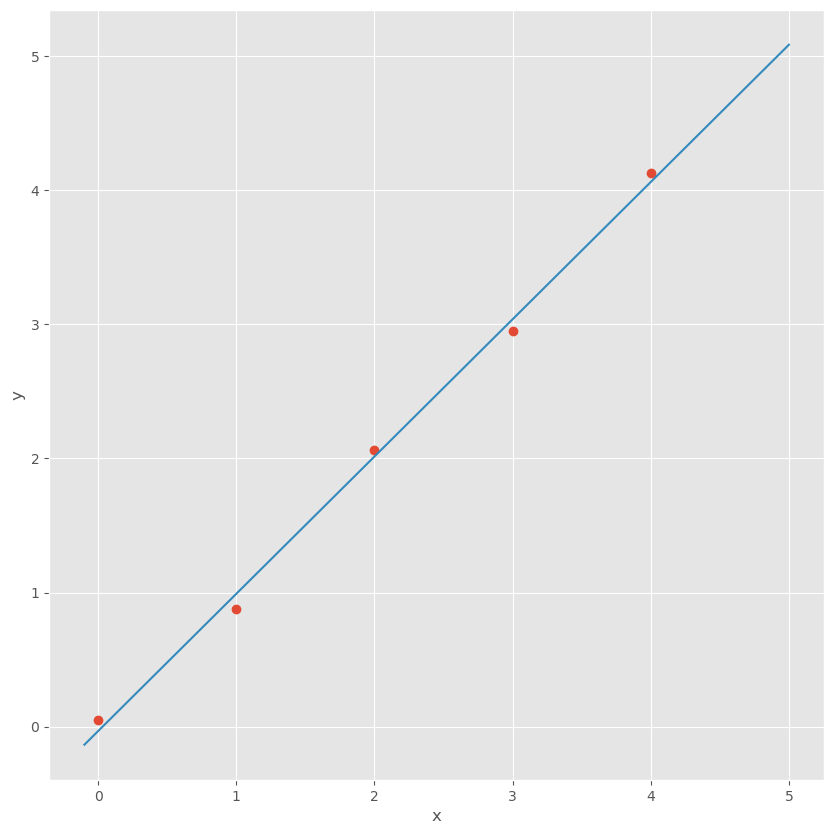

In [13]:
plt.plot(x,y,'o')
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('y')

Finally, use the covarience matrix, $(M^T M)^{-1} \sigma$ to compute the errors on $a$ and $b$.

In [16]:
sum = 0
'''
for i in range(len(x)):
    sum+= ()
sigma = 1/len(x) 
'''
print(MTM_inv)

[[ 0.6 -0.2]
 [-0.2  0.1]]


<font color = 'blue'>
I'm going to let this one be one of the questions I skip- I remember a lot about regressions from Econometrics and ED displays these equations is too confusing. 
</font>

## Important note
Computing the matrix inverse of $M^T M$ is required to get the covariance matrix. Typically, we don't invert matrices numerically unless we really, really need to. There's almost always a better way. In fact, the discussion above is pedagogical: I want you to learn how least squares works. In practice, one would use singular value decomposition to compute the least squares fit.